In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

home_dir = "/scratch/hydro4/shared_data/uk_catchment_data/camels_gb_v2/"

## Examine relationship between flow and precipitation

In [2]:
topography = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_topographic_attributes.csv")
# gauge_locs = topography[['gauge_id', 'gauge_lat', 'gauge_lon']]
del topography['gauge_easting']
del topography['gauge_northing']

In [3]:
hydrologic_attributes = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_hydrologic_attributes.csv")
climatic_attributes = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_climatic_attributes.csv")
climatic_attributes.head()

,gauge_id,p_mean,pet_mean,aridity,p_seasonality,frac_snow,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
0,10002,2.35,1.33,0.56,-0.06,0.03,13.75,1.16,son,205.90,3.13,jja
1,10003,2.37,1.35,0.57,-0.02,0.04,13.62,1.17,son,208.21,3.20,mam
2,1001,2.56,1.21,0.47,-0.15,0.04,10.58,1.11,son,181.56,2.92,jja
3,101002,2.37,1.81,0.76,-0.22,0.00,20.67,1.17,son,243.73,4.44,jja
4,101005,2.28,1.80,0.79,-0.20,0.00,20.60,1.19,son,245.58,4.51,jja


In [4]:
climatic_attributes = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_climatic_attributes.csv")
topography_with_precip = pd.merge(topography, climatic_attributes[['gauge_id', 'p_mean']])
topography_with_precip.columns

Index(['gauge_id', 'gauge_name', 'gauge_lat', 'gauge_lon', 'gauge_elev',
       'area', 'dpsbar', 'elev_mean', 'elev_min', 'elev_10', 'elev_50',
       'elev_90', 'elev_max', 'p_mean'],
      dtype='object')

In [ ]:
## Follows roughly what we'd expect, but with some outliers We could then look into the outliers?

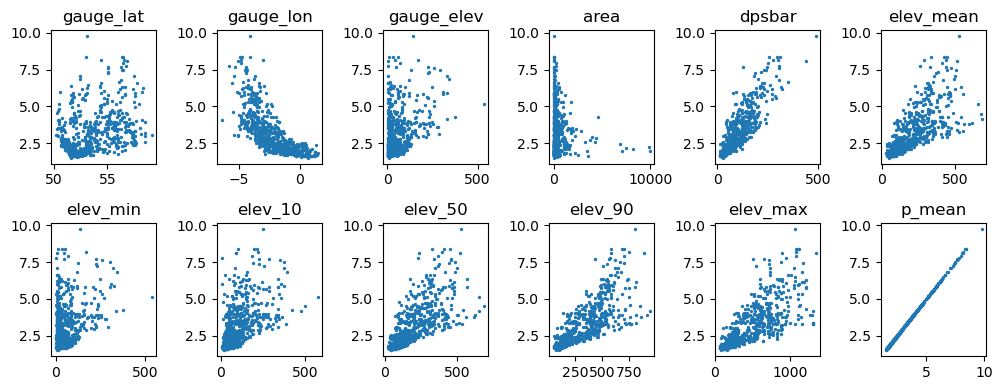

In [6]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(10,4)) #wide, tall
axs=axs.flatten()
for ax_num, col in enumerate(topography_with_precip.columns[2:]):
    axs[ax_num].scatter(topography_with_precip[col], topography_with_precip['p_mean'], s=2) 
    axs[ax_num].set_title(col)
fig.tight_layout()
for ax in axs[len(topography_with_precip.columns[2:]):]:
    ax.axis('off')